In [3]:
import numpy as np
import pandas as pd

In [4]:
df_train = pd.read_csv("../data/processed/processed_train.csv")
df_test = pd.read_csv("../data/processed/processed_test.csv")

df_train

,Unnamed: 0,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,71,100083,0,0,103500.0,573628.5,24435.0,463500.0,0.009657,-15406,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,124,100145,0,1,202500.0,260725.5,16789.5,198000.0,0.018850,-16282,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,152,100179,0,0,202500.0,675000.0,53329.5,675000.0,0.031329,-11375,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
3,161,100190,0,0,162000.0,263686.5,24781.5,238500.0,0.022625,-13972,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,255,100295,1,1,225000.0,1019205.0,31032.0,774000.0,0.072508,-11356,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8597,307358,456083,0,2,112500.0,361462.5,16051.5,274500.0,0.025164,-15006,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
8598,307359,456084,0,1,99000.0,675000.0,21906.0,675000.0,0.020246,-14007,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8599,307407,456140,1,1,261000.0,711454.5,47673.0,643500.0,0.018850,-11407,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
8600,307456,456195,0,0,94500.0,270000.0,15075.0,270000.0,0.028663,-20246,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [5]:
corr_rank = df_train.corr()['TARGET'].sort_values()
corr_rank.head(n=15)

EXT_SOURCE_3           -0.150720
EXT_SOURCE_2           -0.130969
EXT_SOURCE_1           -0.129548
FLOORSMAX_AVG          -0.046110
FLOORSMAX_MODE         -0.045990
FLOORSMAX_MEDI         -0.045206
AMT_INCOME_TOTAL       -0.039762
FLOORSMIN_MEDI         -0.033313
FLOORSMIN_AVG          -0.032904
FLOORSMIN_MODE         -0.031688
TOTALAREA_MODE         -0.029714
LIVINGAPARTMENTS_AVG   -0.028103
APARTMENTS_AVG         -0.028069
FLAG_DOCUMENT_13       -0.027218
YEARS_BUILD_AVG        -0.026922
Name: TARGET, dtype: float64

In [6]:
train = df_train[['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'DEF_30_CNT_SOCIAL_CIRCLE']]
test = df_test[['EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'DEF_30_CNT_SOCIAL_CIRCLE']]
train

,TARGET,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DEF_30_CNT_SOCIAL_CIRCLE
0,0,0.597192,0.270766,0.707126,-892,-15406,2,2,-2053.0,-4176,1.0
1,0,0.739412,0.647045,0.746486,-4375,-16282,2,2,-1782.0,-1494,0.0
2,0,0.673830,0.674832,0.616156,-2311,-11375,2,2,-1792.0,-2009,0.0
3,0,0.788681,0.534999,0.585859,-4472,-13972,2,2,-1161.0,-4529,0.0
4,1,0.463275,0.262005,0.302394,-602,-11356,1,1,-14.0,-3224,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8597,0,0.758393,0.653115,0.418337,-1105,-15006,2,2,-1907.0,-2465,0.0
8598,0,0.475850,0.383096,0.612929,-2021,-14007,3,3,-1789.0,-1177,0.0
8599,1,0.624615,0.766549,0.696695,-1641,-11407,2,2,-572.0,-2923,2.0
8600,0,0.723837,0.823222,0.534302,-5452,-20246,2,2,-2299.0,-3784,0.0


In [7]:
test

,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DEF_30_CNT_SOCIAL_CIRCLE
0,0.263647,0.344165,0.684407,-1007,-13563,1,1,-317.0,-4044,0.0
1,0.347418,0.339002,0.375073,-1883,-10962,2,2,-1616.0,-1721,0.0
2,0.218859,0.379074,0.273194,-2612,-11819,2,2,-1257.0,-4134,0.0
3,0.641368,0.658198,0.364307,-1659,-13444,3,3,-1901.0,-4436,0.0
4,0.300108,0.176322,0.575642,-852,-8819,2,2,-1615.0,-1476,0.0
...,...,...,...,...,...,...,...,...,...,...
1734,0.703203,0.327700,0.442370,-2038,-10205,2,2,-2131.0,-2512,2.0
1735,0.704706,0.368440,0.562359,-4409,-20876,2,2,-741.0,-3976,0.0
1736,0.297087,0.181947,0.558863,-1437,-9952,2,2,-844.0,-2263,0.0
1737,0.213967,0.629403,0.701401,-632,-10159,1,2,-417.0,-2842,0.0


In [8]:
train['TRAINING'] = True
test['TRAINING'] = False
y = train.TARGET
y

C:\Users\adrie\AppData\Local\Temp/ipykernel_36900/1356374090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['TRAINING'] = True
C:\Users\adrie\AppData\Local\Temp/ipykernel_36900/1356374090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['TRAINING'] = False


0       0
1       0
2       0
3       0
4       1
       ..
8597    0
8598    0
8599    1
8600    0
8601    0
Name: TARGET, Length: 8602, dtype: int64

In [9]:
train.drop(columns = 'TARGET', inplace=True)
x = pd.concat([train, test], axis = 0)
x.DAYS_EMPLOYED.describe()

c:\Users\adrie\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


count    10341.000000
mean     -2338.074558
std       2092.166588
min     -17124.000000
25%      -3219.000000
50%      -1719.000000
75%       -836.000000
max         -4.000000
Name: DAYS_EMPLOYED, dtype: float64

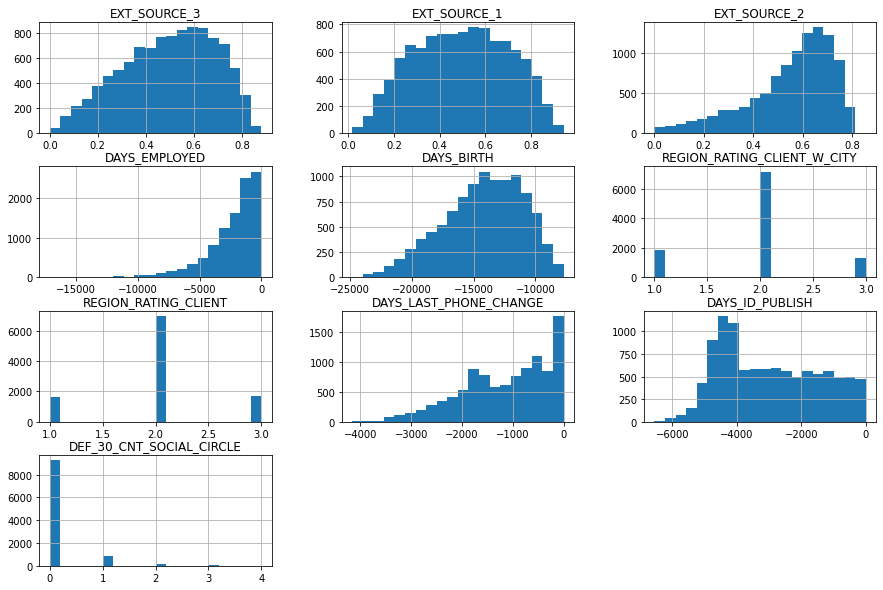

In [10]:
x.hist(figsize = (15,10), bins = 20);


In [11]:
x.nunique()


EXT_SOURCE_3                     657
EXT_SOURCE_1                   10199
EXT_SOURCE_2                    9768
DAYS_EMPLOYED                   4745
DAYS_BIRTH                      6911
REGION_RATING_CLIENT_W_CITY        3
REGION_RATING_CLIENT               3
DAYS_LAST_PHONE_CHANGE          2922
DAYS_ID_PUBLISH                 4534
DEF_30_CNT_SOCIAL_CIRCLE           5
TRAINING                           2
dtype: int64

In [12]:
skew_list = x.skew()
skew_list

EXT_SOURCE_3                  -0.305637
EXT_SOURCE_1                  -0.043040
EXT_SOURCE_2                  -0.990341
DAYS_EMPLOYED                 -1.730579
DAYS_BIRTH                    -0.428884
REGION_RATING_CLIENT_W_CITY   -0.029295
REGION_RATING_CLIENT           0.000410
DAYS_LAST_PHONE_CHANGE        -0.548199
DAYS_ID_PUBLISH                0.284225
DEF_30_CNT_SOCIAL_CIRCLE       3.750561
TRAINING                      -1.774710
dtype: float64

In [13]:
cols_to_scale = x.select_dtypes(exclude = ['object', 'bool']).columns.values.tolist()
cols_to_scale

['EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_ID_PUBLISH',
 'DEF_30_CNT_SOCIAL_CIRCLE']

In [14]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, MaxAbsScaler, StandardScaler
robust_scaler = RobustScaler().fit(x[cols_to_scale])
standard_scaler = StandardScaler().fit(x[cols_to_scale])
minmax_scaler = MinMaxScaler().fit(x[cols_to_scale])

In [15]:
x[cols_to_scale] = robust_scaler.transform(x[cols_to_scale])
x

,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DEF_30_CNT_SOCIAL_CIRCLE,TRAINING
0,0.290149,-0.702796,0.517163,0.347042,-0.312593,0.0,0.0,-0.790406,-0.372965,1.0,True
1,0.773906,0.450625,0.698486,-1.114561,-0.499254,0.0,0.0,-0.590406,0.642560,0.0,True
2,0.550831,0.535800,0.098087,-0.248426,0.546346,0.0,0.0,-0.597786,0.447558,0.0,True
3,0.941494,0.107165,-0.041487,-1.155266,-0.007032,0.0,0.0,-0.132103,-0.506626,0.0,True
4,-0.165368,-0.729651,-1.347341,0.468737,0.550394,-1.0,-1.0,0.714391,-0.012495,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
1734,0.650743,-0.528274,-0.702504,-0.133865,0.795653,0.0,0.0,-0.847970,0.257100,2.0,False
1735,0.655856,-0.403393,-0.149745,-1.128829,-1.478159,0.0,0.0,0.177860,-0.297236,0.0,False
1736,-0.730657,-0.975056,-0.165849,0.118338,0.849563,0.0,0.0,0.101845,0.351382,0.0,False
1737,-1.013387,0.396547,0.490790,0.456148,0.805455,-1.0,0.0,0.416974,0.132147,0.0,False


In [16]:
x = pd.get_dummies(x)
x

,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DEF_30_CNT_SOCIAL_CIRCLE,TRAINING
0,0.290149,-0.702796,0.517163,0.347042,-0.312593,0.0,0.0,-0.790406,-0.372965,1.0,True
1,0.773906,0.450625,0.698486,-1.114561,-0.499254,0.0,0.0,-0.590406,0.642560,0.0,True
2,0.550831,0.535800,0.098087,-0.248426,0.546346,0.0,0.0,-0.597786,0.447558,0.0,True
3,0.941494,0.107165,-0.041487,-1.155266,-0.007032,0.0,0.0,-0.132103,-0.506626,0.0,True
4,-0.165368,-0.729651,-1.347341,0.468737,0.550394,-1.0,-1.0,0.714391,-0.012495,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
1734,0.650743,-0.528274,-0.702504,-0.133865,0.795653,0.0,0.0,-0.847970,0.257100,2.0,False
1735,0.655856,-0.403393,-0.149745,-1.128829,-1.478159,0.0,0.0,0.177860,-0.297236,0.0,False
1736,-0.730657,-0.975056,-0.165849,0.118338,0.849563,0.0,0.0,0.101845,0.351382,0.0,False
1737,-1.013387,0.396547,0.490790,0.456148,0.805455,-1.0,0.0,0.416974,0.132147,0.0,False


In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
imputer = IterativeImputer()
x.isna().sum()

EXT_SOURCE_3                   0
EXT_SOURCE_1                   0
EXT_SOURCE_2                   0
DAYS_EMPLOYED                  0
DAYS_BIRTH                     0
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
DAYS_LAST_PHONE_CHANGE         0
DAYS_ID_PUBLISH                0
DEF_30_CNT_SOCIAL_CIRCLE       0
TRAINING                       0
dtype: int64

In [18]:
x = pd.DataFrame(imputer.fit_transform(x), columns = x.columns)
x

,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DEF_30_CNT_SOCIAL_CIRCLE,TRAINING
0,0.290149,-0.702796,0.517163,0.347042,-0.312593,0.0,0.0,-0.790406,-0.372965,1.0,1.0
1,0.773906,0.450625,0.698486,-1.114561,-0.499254,0.0,0.0,-0.590406,0.642560,0.0,1.0
2,0.550831,0.535800,0.098087,-0.248426,0.546346,0.0,0.0,-0.597786,0.447558,0.0,1.0
3,0.941494,0.107165,-0.041487,-1.155266,-0.007032,0.0,0.0,-0.132103,-0.506626,0.0,1.0
4,-0.165368,-0.729651,-1.347341,0.468737,0.550394,-1.0,-1.0,0.714391,-0.012495,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10336,0.650743,-0.528274,-0.702504,-0.133865,0.795653,0.0,0.0,-0.847970,0.257100,2.0,0.0
10337,0.655856,-0.403393,-0.149745,-1.128829,-1.478159,0.0,0.0,0.177860,-0.297236,0.0,0.0
10338,-0.730657,-0.975056,-0.165849,0.118338,0.849563,0.0,0.0,0.101845,0.351382,0.0,0.0
10339,-1.013387,0.396547,0.490790,0.456148,0.805455,-1.0,0.0,0.416974,0.132147,0.0,0.0


In [19]:
x.isna().sum().sum()

0

In [20]:
train = x[x['TRAINING'] == True]
test = x[x['TRAINING'] == False]
train.drop(columns = 'TRAINING', inplace=True)
test.drop(columns = 'TRAINING', inplace=True)

c:\Users\adrie\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train, y, test_size = .3, random_state = 7)

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)

In [23]:
score = clf.score(x_test, y_test)

In [24]:
import joblib

joblib_file = "../models/Gradient_boosting_model.pkl"
joblib.dump(clf,joblib_file)

['../models/Gradient_boosting_model.pkl']

In [25]:
joblib_file = "../models/Gradient_boosting_model.pkl"

clf = joblib.load(joblib_file)

In [26]:
import mlflow
import mlflow.sklearn
import joblib
from mlflow.models.signature import infer_signature

# Start an MLflow run
with mlflow.start_run() as run:
    # Log the parameters of the model
    mlflow.log_param("CLF Score", score)
    # mlflow.log_param("x", 2)
    # Train the model
    joblib_file = "Gradient_boosting_model.pkl"
    model = clf
    # Log the accuracy of the model
    mlflow.log_metric("accuracy", model.score(x_test, y_test))
    # Log the log loss of the model
    #mlflow.log_metric("log_loss", log_loss(y_test,model.predict_proba(x_test)))
    # Log the model
    signature = infer_signature(x_train, clf.predict(x_train))
    mlflow.sklearn.log_model(model, "model_test",signature = signature)
    #mlflow.set_tracking_uri("http://localhost:5000")


In [28]:
!mlflow ui

^C


# SHAP

### Build a TreeExplainer and compute Shaplay Values

In [49]:
import shap
import matplotlib.pyplot as plt

# Create object that can calculate shap values
explainer = shap.TreeExplainer(clf)

### Visualize explanations for a specific point of your data set,

In [31]:
shap.initjs()

In [46]:
shap_values = explainer.shap_values(x_train)

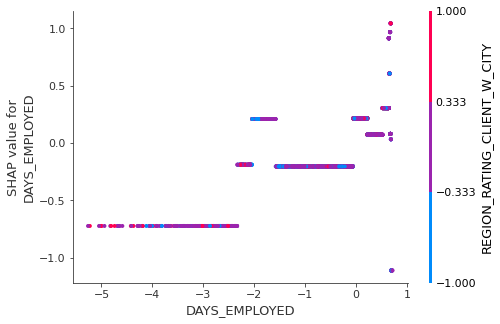

In [50]:
shap.dependence_plot('DAYS_EMPLOYED', shap_values, x_train, show=False)
plt.savefig('../reports/figures/dependence.png')

### Visualize explanations for all points of  your data set at once,

In [ ]:
shap_values = explainer.shap_values(x_train[:2])

In [53]:
shap.force_plot(explainer.expected_value, shap_values[0, :], x_test.iloc[0, :], show=False)
plt.savefig('../reports/figures/force_plot.png')


<Figure size 432x288 with 0 Axes>

### Visualize a summary plot for each class on the whole dataset.

In [35]:
shap_values_gbd = explainer(x_train)

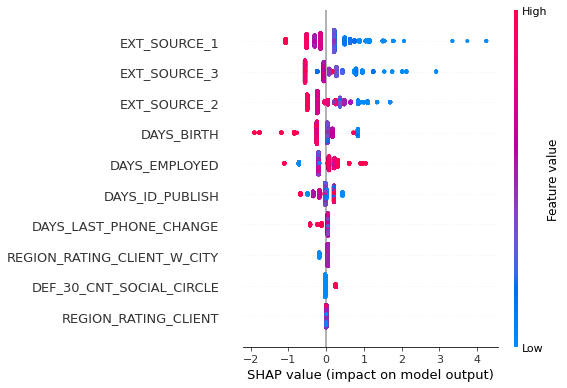

In [54]:
shap.summary_plot(shap_values_gbd, show=False)
plt.savefig('../reports/figures/summary_plot.png')

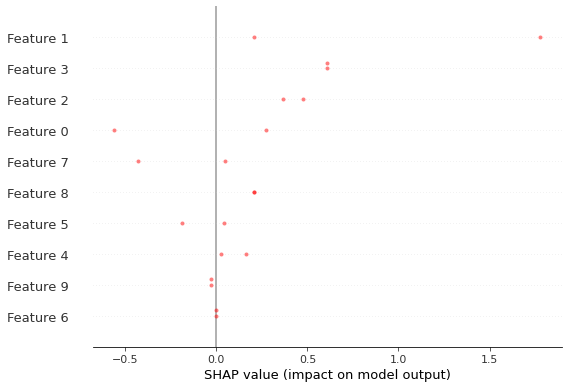

In [37]:
point_index = 0
shap_values = explainer.shap_values(x_train[:2])

# plot the summary of the point feature_names=feature_names
shap.summary_plot(shap_values, color = 'red',alpha = 0.5, show=False)
plt.savefig('../reports/figures/summary_plot_explained.png')

### Optional

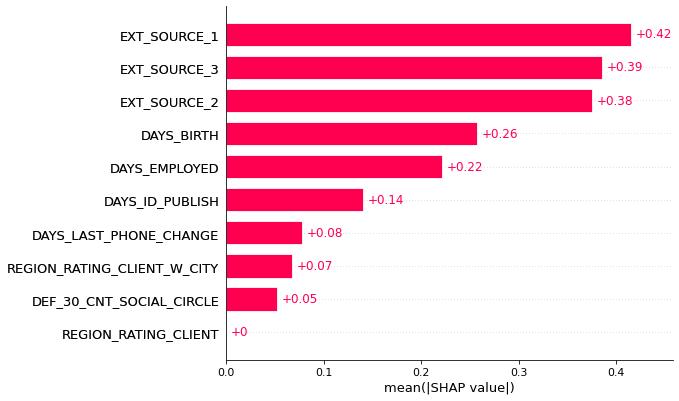

In [55]:
shap.plots.bar(shap_values_gbd, show=False)
plt.savefig('../reports/figures/bar.png')

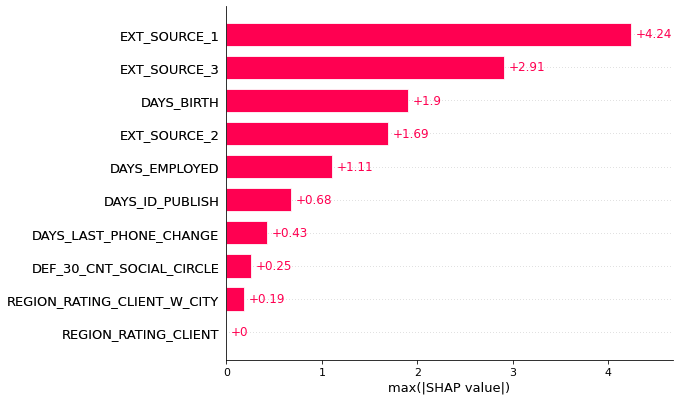

In [39]:
shap.plots.bar(shap_values_gbd.abs.max(0))


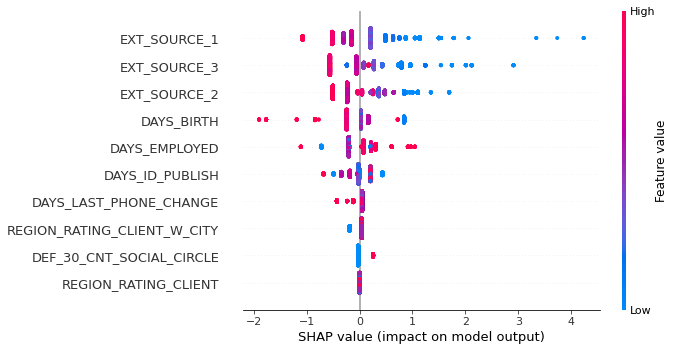

In [57]:
shap.plots.beeswarm(shap_values_gbd, show=False)
plt.savefig('../reports/figures/beeswarm.png')

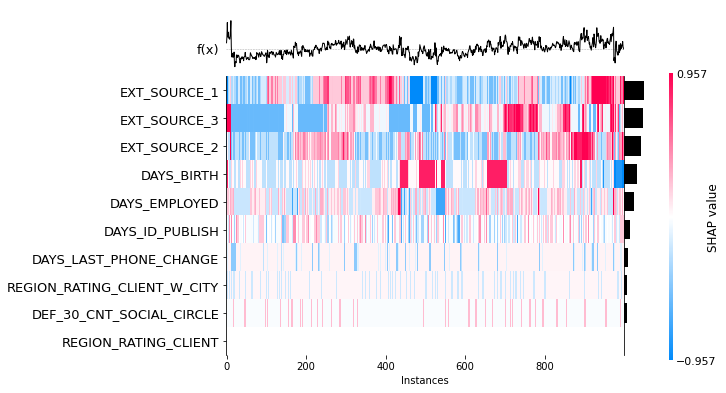

In [41]:
shap.plots.heatmap(shap_values_gbd[:1000])


In [ ]:
!jupyter nbconvert --to html my-notebook.ipynb

[NbConvertApp] WARNING | pattern 'my-notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
   

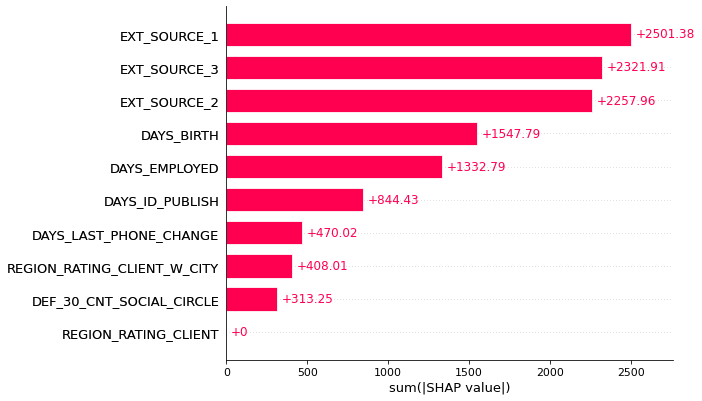

<Figure size 432x288 with 0 Axes>

In [58]:
shap.plots.bar(shap_values_gbd.abs.sum(0))
plt.savefig('../reports/figures/values_gbd_bar.png')

In [ ]:
!conda env export > environment.yml